In [ ]:
pip install graphviz

In [ ]:
pip install tensorflow

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import plot_roc_curve
import tensorflow as tf
from sklearn.metrics import confusion_matrix, average_precision_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score
#Import the packages that will likely be required based on the guides followed
%matplotlib inline

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error

In [ ]:
from google.colab import files#Only needed if you are working on Colab, choose the file you are using, otherwise, ignore this block of code if you are working in a directory where the file is already present
uploaded = files.upload()

In [ ]:
features = pd.read_csv('balanced.csv')#Read the file
features.head(5)#Print the first five lines

,cid,acvalue,smiles,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,...,De,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,225100,4.0000,O=C(O)CSc1nc2cc(Cl)c(Cl)cc2[nH]1,inactive,1,1.2172,1.481576,34.1060,30.904758,9,10,22,16,6,0,9,2,2,1,0,0.0,2.0,0.0,0.0,2.0,4866.470694,3285.911675,5125.915532,5823.261916,4023.627644,3755.414546,2366.160564,2010.701122,1851.892400,6349.023301,7253.070731,10367.565415,10340.266164,7838.209328,6365.402729,...,1.413581,11.445241,1.176596,0.258144,0.888607,0.091351,0.563188,0.284529,0.217283,12.879982,16.724678,33.080940,0.832910,1.065000,11.312779,1.437079,0.345254,0.863893,0.109742,0.548770,0.423822,0.448298,13.095112,20.659296,39.367328,0.795840,1.420891,11.688495,1.325009,0.348914,0.874729,0.099159,0.585817,0.360563,0.458213,13.362418,20.027951,38.794126,0.812094,1.404593
1,1825716,0.5500,Cc1ccc(OCCSc2ncccn2)c(Br)c1,inactive,0,1.9905,3.962090,32.9382,40.500309,12,12,31,18,13,0,13,2,1,1,0,0.0,0.0,1.0,0.0,1.0,9065.915841,3905.568826,5680.398994,6633.296591,5370.358053,3698.544856,3127.935587,2890.234735,4082.689219,7739.752888,9009.086446,12129.769040,12295.294407,10303.119687,8950.141038,...,1.434107,16.154816,1.937974,0.569152,0.865656,0.103846,0.482243,0.533074,0.208126,18.661941,41.605152,78.085876,0.798484,1.223443,17.856844,1.913562,0.790178,0.868499,0.093069,0.589039,0.508048,0.436256,20.560585,49.792328,97.353445,0.802748,1.533343,17.690543,1.835237,0.746796,0.872634,0.090528,0.578062,0.470886,0.395607,20.272577,47.048120,91.566431,0.808951,1.444554
2,11679800,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,1,0.5752,0.330855,29.2113,31.098344,9,10,24,16,8,0,10,2,2,0,0,0.0,2.0,0.0,0.0,2.0,4868.502822,3310.125851,5175.359948,5908.016572,4138.596092,3805.875026,2418.653172,2153.635522,1851.892400,6411.190790,7482.543964,10857.595624,11041.939075,8687.377805,6886.516683,...,1.303480,11.450959,1.168955,0.327426,0.884426,0.090285,0.619005,0.292564,0.145712,12.947340,17.517751,34.847909,0.826638,1.057281,10.717133,1.409146,0.506650,0.848349,0.111545,0.540422,0.426244,0.372027,12.632930,21.245790,41.530153,0.772523,1.338693,10.934821,1.303764,0.486393,0.859319,0.102457,0.562681,0.366310,0.342588,12.724978,20.209189,39.868393,0.788979,1.271579
3,14162967,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,0,0.8200,0.672400,134.7535,90.681236,0,0,86,34,52,0,30,0,4,0,0,0.0,0.0,0.0,0.0,0.0,5404.630962,6175.020141,10569.200499,13928.758477,13530.953189,12097.098300,10334.456402,9302.450418,8506.558222,15187.424871,21022.387874,36014.128236,51007.246921,57789.310825,54153.421222,...,1.462925,13.356831,4.713860,1.551971,0.680684,0.240225,0.480137,0.404662,0.310977,19.622663,91.007428,208.345661,0.521026,1.195776,14.202111,5.192340,1.924706,0.666167,0.243553,0.542372,0.492669,0.478277,21.319157,111.070800,274.321969,0.499250,1.513318,14.162502,5.110835,1.876100,0.669640,0.241653,0.539443,0.477526,0.454229,21.149437,108.540907,265.486570,0.504460,1.471197
4,14525327,3.0000,C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)[C...,inactive,1,0.5720,0.327184,23.2561,66.975067,27,30,52,33,19,0,27,2,3,0,0,0.0,1.0,0.0,0.0,1.0,6331.435084,6142.860146,9234.538103,9868.519933,9714.146137,9004.759376,7164.482540,7034.156940,7315.727153,13665.319127,16934.930973,24849.027523,27613.596117,26181.310788,23695.728859,...,1.562560,32.678344,1.875418,1.309409,0.911195,0.052294,0.519289,0.277799,0.326617,35.863171,106.530578,222.641628,0.866793,1.123705,35.436934,2.242259,1.712113,0.899613,0.056923,0.609762,0.443232,0.586587,39.391306,143.969814,319.403533,0.849420,1.639581,35.140178,2.228841,1.614423,0.901413,0.057174,0.600107,0.432198,0.526542,38.983441,138.651258,304.079293,0.852119,1.558847


In [ ]:
print('The shape of our features is:', features.shape)#Dimension of the dataset

The shape of our features is: (292, 1879)


In [ ]:
features.describe()#Equivalent to summary function on R

,cid,acvalue,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,De,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
count,2.920000e+02,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,9.311034e+07,0.984303,0.780822,-0.289388,0.641622,46.318243,58.987878,15.839041,18.017123,48.907534,28.397260,20.510274,0.0,21.527397,2.212329,3.359589,0.099315,0.017123,0.393836,0.777397,0.010274,0.0,1.181507,5666.186609,5457.027849,8254.057134,9105.793340,8904.691768,7856.463294,6552.308919,6367.253225,5517.550777,11546.980381,14637.509342,22180.618490,25467.576317,25047.629760,22672.087369,19365.585506,17092.414535,...,1.349740,21.526577,2.770099,0.690189,0.842432,0.129116,0.477361,0.329190,0.189576,24.986865,76.961898,150.620850,0.763782,0.996127,23.903806,3.244504,0.902357,0.832262,0.133957,0.595462,0.465302,0.346871,28.050667,101.910759,208.587674,0.748455,1.407635,23.663358,3.175451,0.868644,0.833951,0.133095,0.580732,0.445563,0.322194,27.707453,98.381196,199.932229,0.750955,1.348489
std,2.845981e+07,3.903559,0.483304,0.748193,0.845010,27.640566,16.036612,4.878396,5.857094,15.879973,6.267222,10.723800,0.0,5.295002,1.436916,1.117255,0.310857,0.129954,0.844853,0.485285,0.101012,0.0,0.697024,1116.395803,1245.320145,1995.084596,2326.131285,2205.841619,2182.544570,2039.722758,1769.588229,2153.319621,2639.358789,3733.102472,6373.416796,9132.169527,10837.408959,10622.181711,9432.016513,8245.229696,...,0.094569,11.896724,1.214758,0.450827,0.069141,0.060806,0.046398,0.049309,0.078344,12.014095,54.639245,120.763363,0.103291,0.112663,12.783018,1.250567,0.526852,0.071499,0.060938,0.048223,0.044625,0.097627,12.843700,65.726037,158.474712,0.107071,0.100190,12.822015,1.250520,0.511654,0.071198,0.060875,0.043798,0.041083,0.089886,12.887248,65.155626,154.818855,0.106715,0.094307
min,2.251000e+05,0.000500,0.000000,-2.559900,0.000108,13.956400,30.904758,0.000000,0.000000,22.000000,16.000000,5.000000,0.0,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3336.450684,3285.911675,5125.915532,5323.657259,4023.627644,3607.608088,2366.160564,2010.701122,1504.267331,6349.023301,7253.070731,10367.565415,10340.266164,7838.209328,6365.402729,4980.517854,4055.255281,...,1.115445,7.779943,1.120482,0.057786,0.613993,0.026861,0.372552,0.204076,0.051435,10.923650,16.724678,33.080940,0.437964,0.786902,9.276769,1.361388,0.086319,0.614943,0.031909,0.407492,0.316651,0.109087,12.632930,20.659296,39.367328,0.422414,1.171669,9.103590,1.260030,0.094781,0.620699,0.032083,0.411450,0.299868,0.146048,12.724978,20.027951,38.794126,0.431048,1.102190
25%,8.665904e+07,0.015000,0.750000,-0.761225,0.071777,30.756950,48.472990,15.000000,17.000000,40.000000,24.000000,15.000000,0.0,18.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,4978.077875,4579.680193,6870.508309,7477.629932,7457.813734,6350.625449,5007.395124,5116.375072,3929.164893,9777.340326,12353.690217,18379.562449,2

In [ ]:
#checking for missing data
total_na_count = features.isna().sum()
print("TOTAL MISSING VALUE: ")
print(total_na_count)

TOTAL MISSING VALUE: 
cid         0
acvalue     0
smiles      0
Activity    0
nAcid       0
           ..
Ts          0
As          0
Vs          0
Ks          0
Ds          0
Length: 1879, dtype: int64


In [ ]:
features_raw = pd.DataFrame.from_dict(features)
#the set of molecular descriptors contains empty strings, replacing them by NaN
features = features_raw.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
features = features.dropna()#removing NaN values
features

,cid,acvalue,smiles,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,...,De,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,225100,4.0000,O=C(O)CSc1nc2cc(Cl)c(Cl)cc2[nH]1,inactive,1,1.2172,1.481576,34.1060,30.904758,9,10,22,16,6,0,9,2,2,1,0,0.0,2.0,0.0,0.0,2.0,4866.470694,3285.911675,5125.915532,5823.261916,4023.627644,3755.414546,2366.160564,2010.701122,1851.892400,6349.023301,7253.070731,10367.565415,10340.266164,7838.209328,6365.402729,...,1.413581,11.445241,1.176596,0.258144,0.888607,0.091351,0.563188,0.284529,0.217283,12.879982,16.724678,33.080940,0.832910,1.065000,11.312779,1.437079,0.345254,0.863893,0.109742,0.548770,0.423822,0.448298,13.095112,20.659296,39.367328,0.795840,1.420891,11.688495,1.325009,0.348914,0.874729,0.099159,0.585817,0.360563,0.458213,13.362418,20.027951,38.794126,0.812094,1.404593
1,1825716,0.5500,Cc1ccc(OCCSc2ncccn2)c(Br)c1,inactive,0,1.9905,3.962090,32.9382,40.500309,12,12,31,18,13,0,13,2,1,1,0,0.0,0.0,1.0,0.0,1.0,9065.915841,3905.568826,5680.398994,6633.296591,5370.358053,3698.544856,3127.935587,2890.234735,4082.689219,7739.752888,9009.086446,12129.769040,12295.294407,10303.119687,8950.141038,...,1.434107,16.154816,1.937974,0.569152,0.865656,0.103846,0.482243,0.533074,0.208126,18.661941,41.605152,78.085876,0.798484,1.223443,17.856844,1.913562,0.790178,0.868499,0.093069,0.589039,0.508048,0.436256,20.560585,49.792328,97.353445,0.802748,1.533343,17.690543,1.835237,0.746796,0.872634,0.090528,0.578062,0.470886,0.395607,20.272577,47.048120,91.566431,0.808951,1.444554
2,11679800,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,1,0.5752,0.330855,29.2113,31.098344,9,10,24,16,8,0,10,2,2,0,0,0.0,2.0,0.0,0.0,2.0,4868.502822,3310.125851,5175.359948,5908.016572,4138.596092,3805.875026,2418.653172,2153.635522,1851.892400,6411.190790,7482.543964,10857.595624,11041.939075,8687.377805,6886.516683,...,1.303480,11.450959,1.168955,0.327426,0.884426,0.090285,0.619005,0.292564,0.145712,12.947340,17.517751,34.847909,0.826638,1.057281,10.717133,1.409146,0.506650,0.848349,0.111545,0.540422,0.426244,0.372027,12.632930,21.245790,41.530153,0.772523,1.338693,10.934821,1.303764,0.486393,0.859319,0.102457,0.562681,0.366310,0.342588,12.724978,20.209189,39.868393,0.788979,1.271579
3,14162967,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,0,0.8200,0.672400,134.7535,90.681236,0,0,86,34,52,0,30,0,4,0,0,0.0,0.0,0.0,0.0,0.0,5404.630962,6175.020141,10569.200499,13928.758477,13530.953189,12097.098300,10334.456402,9302.450418,8506.558222,15187.424871,21022.387874,36014.128236,51007.246921,57789.310825,54153.421222,...,1.462925,13.356831,4.713860,1.551971,0.680684,0.240225,0.480137,0.404662,0.310977,19.622663,91.007428,208.345661,0.521026,1.195776,14.202111,5.192340,1.924706,0.666167,0.243553,0.542372,0.492669,0.478277,21.319157,111.070800,274.321969,0.499250,1.513318,14.162502,5.110835,1.876100,0.669640,0.241653,0.539443,0.477526,0.454229,21.149437,108.540907,265.486570,0.504460,1.471197
4,14525327,3.0000,C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)[C...,inactive,1,0.5720,0.327184,23.2561,66.975067,27,30,52,33,19,0,27,2,3,0,0,0.0,1.0,0.0,0.0,1.0,6331.435084,6142.860146,9234.538103,9868.519933,9714.146137,9004.759376,7164.482540,7034.156940,7315.727153,13665.319127,16934.930973,24849.027523,27613.596117,26181.310788,23695.728859,...,1.562560,32.678344,1.875418,1.309409,0.911195,0.052294,0.519289,0.277799,0.326617,35.863171,106.530578,222.641628,0.866793,1.123705,35.436934,2.242259,1.712113,0.899613,0.056923,0.609762,0.443232,0.586587,39.391306,143.969814,319.403533,0.849420,1.639581,35.140178,2.228841,1.614423,0.901413,0.057174,0.600107,0.432198,0.526542,38.983441,138.651258,304.079293,0.852119,1.558847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# ALL PREDICTORS

In [ ]:
X = features.drop(["smiles", "acvalue", "Activity", "cid"], axis = 1) #predictors
y = features['Activity'] #target
y.replace({'active':1, 'inactive':0,'Inactive':0}, inplace = True)
y = pd.DataFrame(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state =42)

BAGGING

In [ ]:
rf_features = BaggingClassifier(random_state = 42)#Python counts from zero(hence 1875), bagging is just a case where m=p
rf_features.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(random_state=42)

In [ ]:
pred1 = rf_features.predict(X_test)
mean_squared_error(y_test, pred1)
pd.DataFrame(pred1)
pred1 = tf.math.round(pred1)
pred1

<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1])>

In [ ]:
rf_features.score(X_train, y_train)

0.9726027397260274

In [ ]:
pred_test = accuracy_score(y_test,pred1)
print('accuracy_score on test dataset : ', pred_test)

accuracy_score on test dataset :  0.547945205479452


In [ ]:
print(classification_report(y_test, pred1, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred1):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred1))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred1))

              precision    recall  f1-score   support

           0      0.515     0.500     0.507        34
           1      0.575     0.590     0.582        39

    accuracy                          0.548        73
   macro avg      0.545     0.545     0.545        73
weighted avg      0.547     0.548     0.547        73

Average precision score: 0.558
Cohen kappa score:  0.08991310918020401
Confusion matrix: 
[[17 17]
 [16 23]]


In [ ]:
parameters = {'max_features':range(1,1875)}

In [ ]:
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1)
clf.fit(X_train, y_train)
Classifer = clf.best_estimator_
print (clf.best_score_, clf.best_params_) #Task takes minimum five hours, dont rerun unless you have time, take the parameter that I have chosen

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

KeyboardInterrupt: 

RANDOM FORESTS

In [ ]:
rf_features_rf = RandomForestClassifier(max_features =637, random_state = 42)
rf_features_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_features=637, random_state=42)

In [ ]:
pred2 = rf_features_rf.predict(X_test)
mean_squared_error(y_test, pred2)
pd.DataFrame(pred2)
pred2 = tf.math.round(pred2)
pred2

<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1])>

In [ ]:
rf_features_rf.score(X_train, y_train)

0.9863013698630136

In [ ]:
pred_test2 = accuracy_score(y_test,pred2)
print('accuracy_score on test dataset : ', pred_test2)

accuracy_score on test dataset :  0.547945205479452


In [ ]:
print(classification_report(y_test, pred2, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred2):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred2))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0      0.522     0.353     0.421        34
           1      0.560     0.718     0.629        39

    accuracy                          0.548        73
   macro avg      0.541     0.535     0.525        73
weighted avg      0.542     0.548     0.532        73

Average precision score: 0.553
Cohen kappa score:  0.072391220639199
Confusion matrix: 
[[12 22]
 [11 28]]


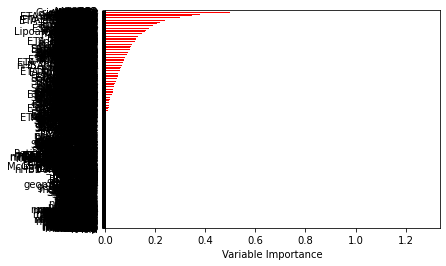

In [ ]:
Importance = pd.DataFrame({'Importance':rf_features_rf.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
from matplotlib.pyplot import figure



plt.gca().legend_ = None

Bagging AUC

RF AUC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


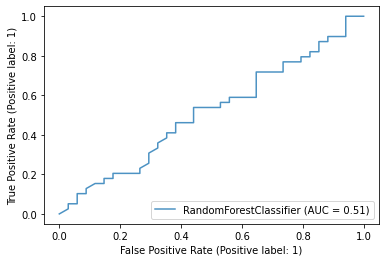

In [ ]:
ax = plt.gca()# Plotted to make sure the two are distinguishable
rfc_disp = plot_roc_curve(rf_features_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


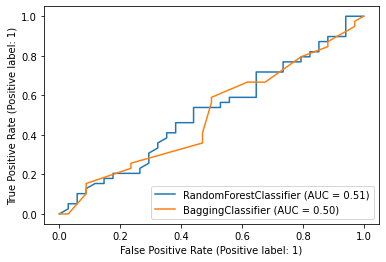

In [ ]:
disp1= plot_roc_curve(rf_features_rf,X_test, y_test)
plot_roc_curve(rf_features,X_test, y_test, ax=disp1.ax_);

# BEST SUBSET TAKEN FROM LASSO

In [ ]:
features_sub = features[['Activity','AATS5i', 'ATSC5p', 'GATS4m', 'GATS2i', 'nHBint6', 'nHeteroRing', 'n5HeteroRing', 'nF9HeteroRing', 'nT5HeteroRing', 'geomShape', 'RDF70m', 'P1p', 'E3s']]

In [ ]:
X1 = features_sub.iloc[:, 1:] #X-axis covers feature sub
y1 = pd.DataFrame(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.75, random_state =42)

Bagging

In [ ]:
rf_features_1 = BaggingClassifier(max_features = 12, random_state = 42) #Python counts from zero(hence 12), bagging is just a case where m=p
rf_features_1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(max_features=12, random_state=42)

In [ ]:
pred3 = rf_features_1.predict(X_test)
mean_squared_error(y_test, pred3)
pd.DataFrame(pred3)
pred3 = tf.math.round(pred3)
pred3

<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1])>

In [ ]:
rf_features_1.score(X_train, y_train)

0.958904109589041

In [ ]:
predict_test3 = rf_features_1.predict(X_test)

In [ ]:
# Accuracy Score of bagging on test dataset
accuracy_test3 = accuracy_score(y_test,predict_test3)
print('accuracy_score on test dataset : ', accuracy_test3)

accuracy_score on test dataset :  0.5068493150684932


In [ ]:
print(classification_report(y_test, pred3, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred3):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred3))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           0      0.469     0.441     0.455        34
           1      0.537     0.564     0.550        39

    accuracy                          0.507        73
   macro avg      0.503     0.503     0.502        73
weighted avg      0.505     0.507     0.506        73

Average precision score: 0.536
Cohen kappa score:  0.005299015897047732
Confusion matrix: 
[[15 19]
 [17 22]]


# VISUALIZING A DECISION TREE

In [ ]:
parameters2 = {'max_features':range(1,13),'max_depth':range(1,13)}#Parameters to find the best tree on a grid search CV

In [ ]:
clf2 = GridSearchCV(tree.DecisionTreeClassifier(), parameters2, n_jobs=-1)
clf2.fit(X_train, y_train)
DT_Classifer = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

0.6486257928118393 {'max_depth': 4, 'max_features': 1}


In [ ]:
model = DecisionTreeClassifier()#Fully grown tree

In [ ]:
model2 = DecisionTreeClassifier(max_depth=4,max_features=1)# Optimized tree

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=1)

In [ ]:
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 14


In [ ]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= -0.08
|   |--- feature_3 <= 0.96
|   |   |--- feature_12 <= 0.31
|   |   |   |--- feature_11 <= 0.86
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  0.86
|   |   |   |   |--- class: 0
|   |   |--- feature_12 >  0.31
|   |   |   |--- feature_10 <= 4.31
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  4.31
|   |   |   |   |--- feature_9 <= 0.84
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.84
|   |   |   |   |   |--- class: 1
|   |--- feature_3 >  0.96
|   |   |--- feature_2 <= 0.97
|   |   |   |--- feature_0 <= 158.41
|   |   |   |   |--- feature_10 <= 5.45
|   |   |   |   |   |--- feature_2 <= 0.91
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  0.91
|   |   |   |   |   |   |--- feature_10 <= 4.19
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_10 >  4.19
|   |   |   |   |   |   |   |--- feature_11 <= 0.84
|   |   |   |   |   |   |   |   |--- class: 0
|   |   | 

In [ ]:
print('Depth of the Decision Tree :', model2.get_depth())

Depth of the Decision Tree : 4


In [ ]:
text_representation2 = tree.export_text(model2)
print(text_representation2)

|--- feature_7 <= 0.50
|   |--- feature_10 <= 6.75
|   |   |--- feature_9 <= 0.84
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.84
|   |   |   |--- feature_11 <= 0.84
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  0.84
|   |   |   |   |--- class: 0
|   |--- feature_10 >  6.75
|   |   |--- feature_12 <= 0.49
|   |   |   |--- feature_12 <= 0.45
|   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  0.45
|   |   |   |   |--- class: 0
|   |   |--- feature_12 >  0.49
|   |   |   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_7 <= 1.50
|   |   |--- feature_8 <= 2.50
|   |   |   |--- feature_0 <= 162.57
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  162.57
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  2.50
|   |   |   |--- feature_11 <= 0.94
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  0.94
|   |   |   |   |--- class: 1
|   |--- feature_7 >  1.50
|   |   |--- feature_8 <= 2.50
|   |   |   |--- feature_5 <= 3.50
|   |   

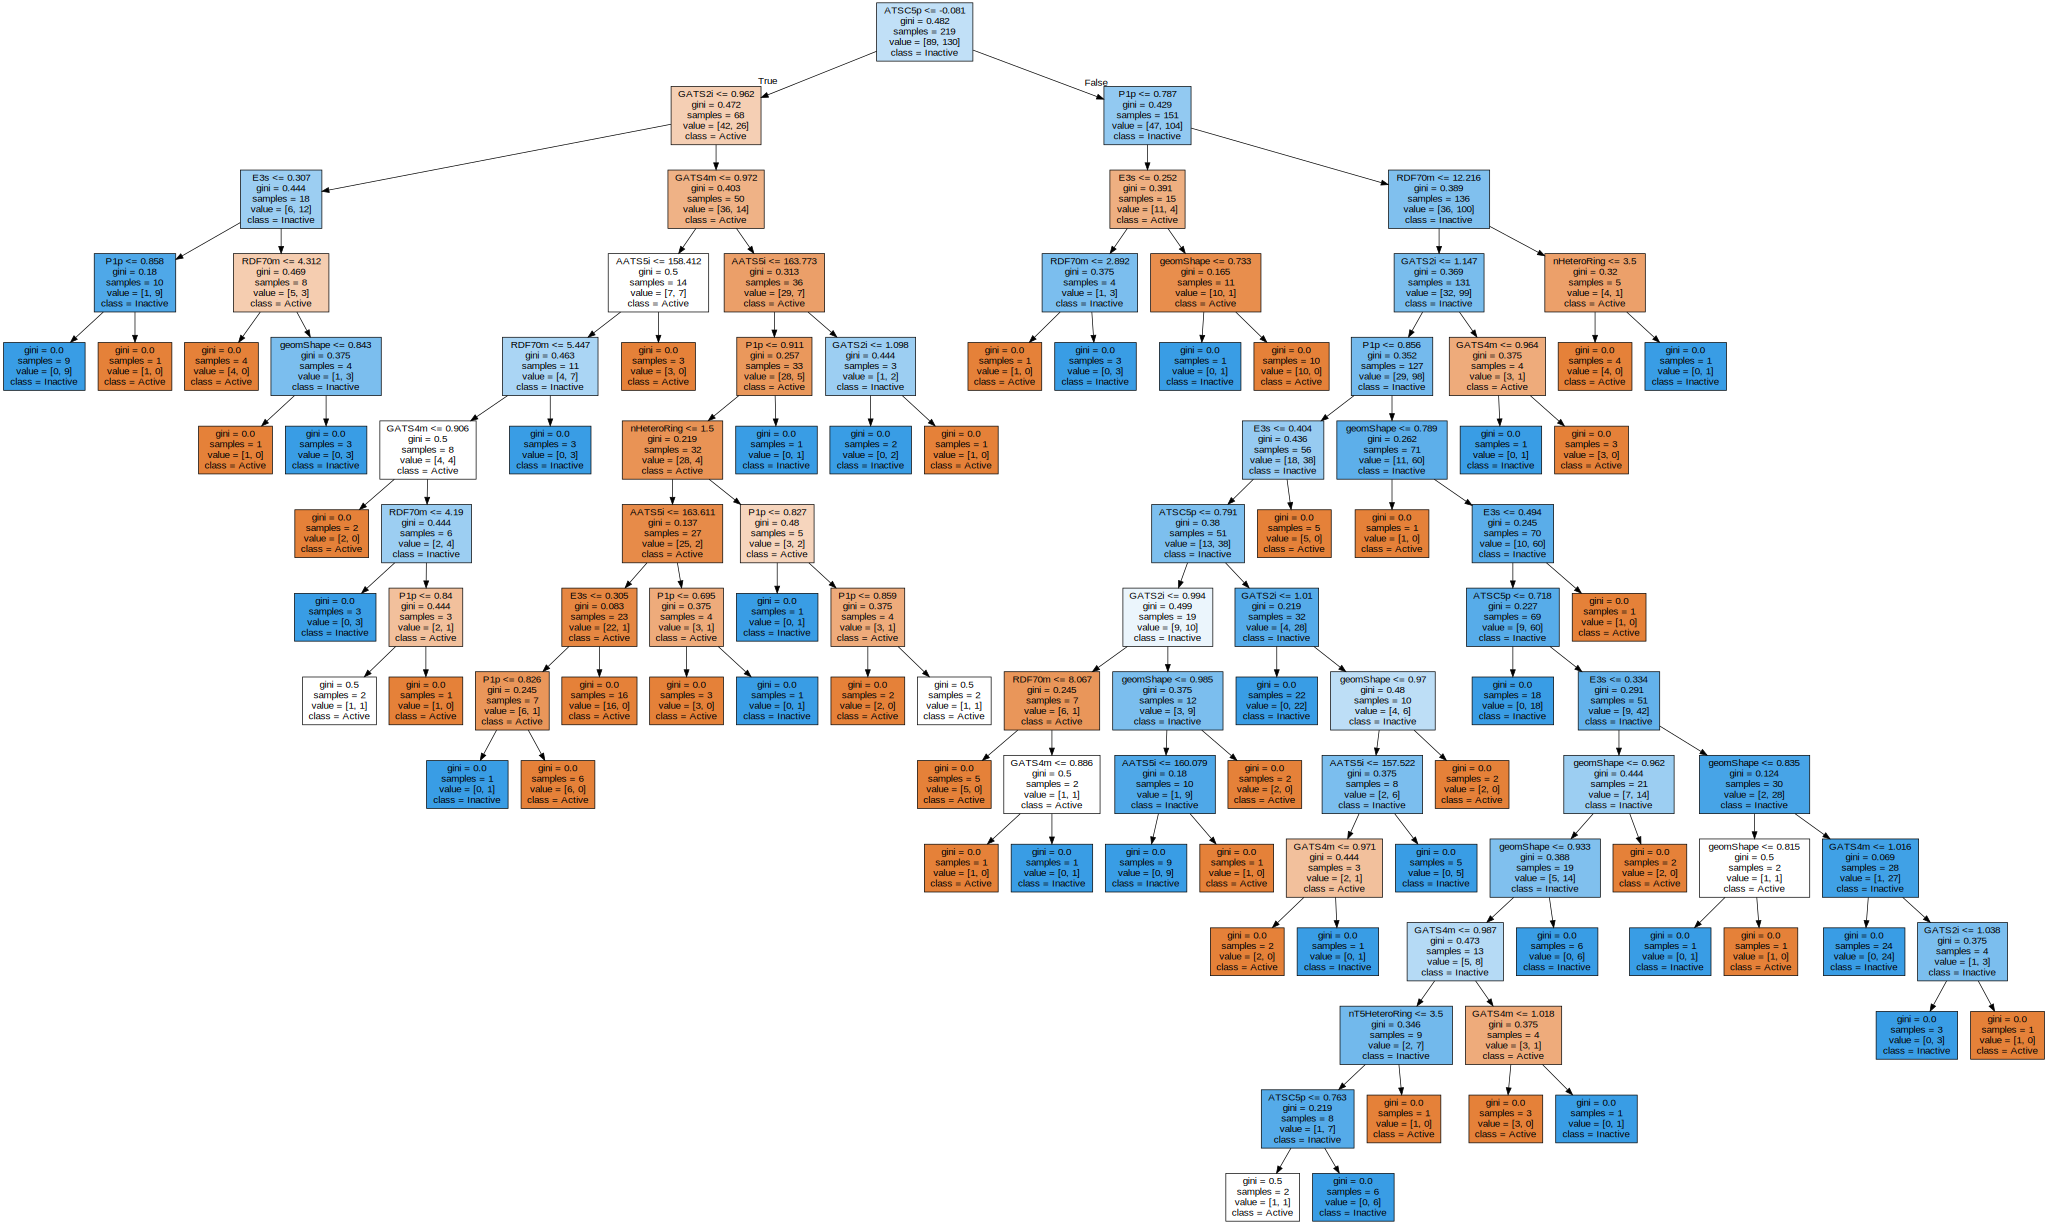

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=['AATS5i', 'ATSC5p', 'GATS4m', 'GATS2i', 'nHBint6', 'nHeteroRing', 'n5HeteroRing', 'nF9HeteroRing', 'nT5HeteroRing', 'geomShape', 'RDF70m', 'P1p','E3s'], ##I think this should be X1 
                                class_names=['Active','Inactive'], ## I think this should be y1 or y but it gives a key value error
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

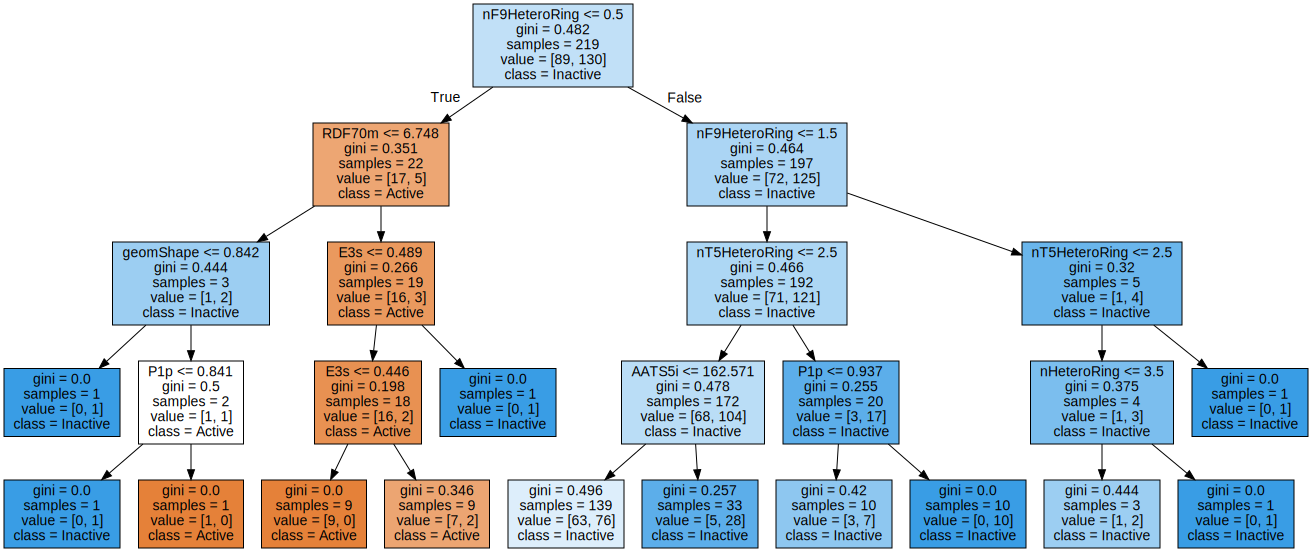

In [ ]:
graph_data2 = tree.export_graphviz(model2, out_file=None, 
                                feature_names=['AATS5i', 'ATSC5p', 'GATS4m', 'GATS2i', 'nHBint6', 'nHeteroRing', 'n5HeteroRing', 'nF9HeteroRing', 'nT5HeteroRing', 'geomShape', 'RDF70m', 'P1p','E3s'], ##I think this should be X1 
                                class_names=['Active','Inactive'], ## I think this should be y1 or y but it gives a key value error
                                filled=True)

# Draw graph
graph2 = graphviz.Source(graph_data2, format="png") 
graph2

In [ ]:
# predict the target on the train dataset with the full tree
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

Target on train data [0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1]


In [ ]:
predict_train2 = model2.predict(X_train)# Prediction on optimized tree
print('Target on train data with Model2',predict_train2) 

Target on train data with Model2 [1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [ ]:
# Accuray Score on train dataset with full tree
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9863013698630136


In [ ]:
# Accuray Score on train dataset on optimized tree
accuracy_train2 = accuracy_score(y_train,predict_train2)
print('accuracy_score on train dataset : ', accuracy_train2)

accuracy_score on train dataset :  0.6621004566210046


In [ ]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test)

Target on test data [1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1]


In [ ]:
# predict the target on the test dataset 2
predict_test2 = model2.predict(X_test)

In [ ]:
# Accuracy Score on test dataset with unoptimized tree
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.4383561643835616


In [ ]:
# Accuracy Score on test dataset with optimized tree
accuracy_test2 = accuracy_score(y_test,predict_test2)
print('accuracy_score on test dataset : ', accuracy_test2)

accuracy_score on test dataset :  0.5616438356164384


In [ ]:
parameters1 = {'max_features':range(1,14)}#Parameters for optimizing Random forests with number of features

RANDOM FOREST

In [ ]:
clf1 = GridSearchCV(RandomForestClassifier(), parameters1, n_jobs=-1)
clf1.fit(X_train, y_train)
best_subset_model1 = clf1.best_estimator_
print (clf1.best_score_, clf1.best_params_) 

0.6441860465116279 {'max_features': 3}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
rf_features_rf_1 = RandomForestClassifier(max_features =3, random_state = 42)
rf_features_rf_1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_features=3, random_state=42)

In [ ]:
pred4 = rf_features_rf_1.predict(X_test)
mean_squared_error(y_test, pred4)
pd.DataFrame(pred4)
pred4 = tf.math.round(pred4)
pred4

<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1])>

In [ ]:
rf_features_rf_1.score(X_train, y_train)

0.9863013698630136

In [ ]:
predict_test4 = rf_features_rf_1.predict(X_test)

In [ ]:
# Accuracy Score on Random Forests on test dataset
accuracy_test4 = accuracy_score(y_test,predict_test4)
print('accuracy_score on test dataset : ', accuracy_test4)

accuracy_score on test dataset :  0.5205479452054794


In [ ]:
print(classification_report(y_test, pred4, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred4):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred4))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred4))

              precision    recall  f1-score   support

           0      0.481     0.382     0.426        34
           1      0.543     0.641     0.588        39

    accuracy                          0.521        73
   macro avg      0.512     0.512     0.507        73
weighted avg      0.515     0.521     0.513        73

Average precision score: 0.540
Cohen kappa score:  0.023691249522353797
Confusion matrix: 
[[13 21]
 [14 25]]


AUC curves

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

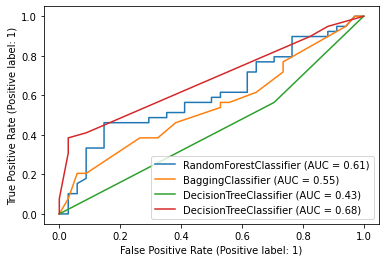

In [ ]:
disp= plot_roc_curve(rf_features_rf_1,X_test, y_test)#Random Forests
plot_roc_curve(rf_features_1,X_test, y_test, ax=disp.ax_);#Bagging
plot_roc_curve(model,X_test, y_test, ax=disp.ax_);#Unoptimized tree 
plot_roc_curve(model2,X_test, y_test, ax=disp.ax_)#Optimized tree